# lesson 1

1\. Given the set of linear equations
$$ 2 x_1 + 2 x_3 = -2 $$
$$ 2 x_1 - 2 x_3 =  6 $$
$$ 3 x_2 - x_1 = -1 $$
derive formulas for $x_1$, $x_2$ and $x_3$ (not necessary in this order) and write a Python program to compute the solution.

In [117]:
import numpy as np

In [118]:
def solve_system(s):
    N = len(s)
    # k idx is fun staff, I am lazy for finding needful line, so I made this and it works :)
    for k in range(N):
        for i in range(N):
            if s[i][i]==0:
                continue
            for j in range(i+1, N):
                s[j] -= s[i] * (s[j][i]/s[i][i])

        for i in range(N-1, -1, -1):
            if s[i][i]==0:
                continue
            for j in range(i-1, -1, -1):
                s[j] -= s[i] * (s[j][i]/s[i][i])
    
    x = np.zeros(N)
    for i in range(N):
        x[i] = s[i][N] / s[i][i]
    return x

In [119]:
M = np.array(
    [[ 2.0, 0.0, 2.0,-2.0],
     [ 2.0, 0.0,-2.0, 6.0],
     [-1.0, 3.0, 0.0,-1.0]])

In [120]:
solve_system(M)

array([ 1.,  0., -2.])

4\. Draw these three vectors 
$$
  \vec v_1 = (0.98480775, 0.17364818)
$$

$$
  \vec v_2 = (-0.64278761,  0.76604444)
$$

$$
  \vec v_3 = (-0.34202014, -0.93969262)
$$

to demonstrate that their sum is zero. Use function `draw_vector` defined 
above or create your own better version if you like.

In [122]:
import matplotlib.pyplot as plt

In [124]:
def draw_vector(ax, label, color, vec, orig):
    """
    Draw a vector
    -------------
    ax : axes
        The axes to draw
    label : str
        The label of the vector
    color : str
        Color specification
    vec : list of two comopnents
        The vector - shifts dx and dy from orig
    orig : list of two components
        The vector begining point
    """
    
    vec_end = [orig[0] + vec[0], orig[1] + vec[1]] 
    ax.annotate("", 
                xytext=orig,  # arrow begining point
                xy=vec_end,   # arrow end point
                arrowprops={'color': color});

    # Draw a transparent circle around a label to improve visibility
    bbox = {'facecolor':'w',
            'edgecolor': 'w',
            'boxstyle': 'circle',
            'alpha': 0.8}

    # Add a text in the middle of the arrow
    ax.text(orig[0] + 0.5*vec[0], orig[1] + 0.5*vec[1], label,
           fontsize=16, bbox=bbox, va='center', ha='center')

In [140]:
v_1 = np.array([0.984807750, 0.173648180])
v_2 = np.array([-0.64278761,  0.76604444])
v_3 = np.array([-0.34202014, -0.93969262])

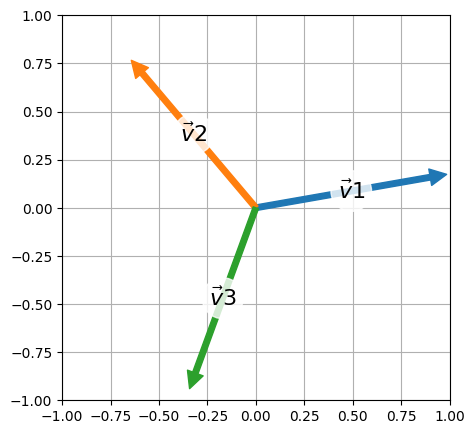

In [143]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

draw_vector(ax, label=r'$\vec v1$', color='C0', vec=v_1, orig=[0,0])
draw_vector(ax, label=r'$\vec v2$', color='C1', vec=v_2, orig=[0,0])
draw_vector(ax, label=r'$\vec v3$', color='C2', vec=v_3, orig=[0,0])

ax.grid()

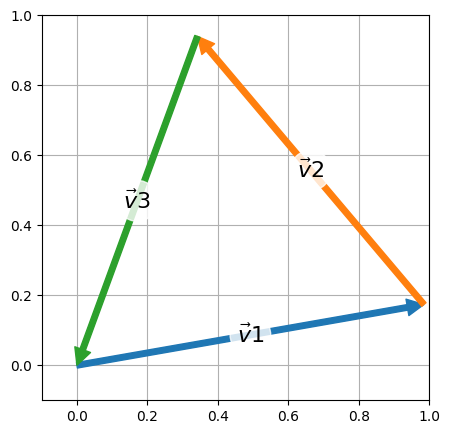

In [147]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_xlim([-0.1, 1])
ax.set_ylim([-0.1, 1])

draw_vector(ax, label=r'$\vec v1$', color='C0', vec=v_1, orig=[0,0])
draw_vector(ax, label=r'$\vec v2$', color='C1', vec=v_2, orig=v_1)
draw_vector(ax, label=r'$\vec v3$', color='C2', vec=v_3, orig=v_1+v_2)

ax.grid()

# lesson 2

7\. Create functions that perform left and right multiplication of a matrix by a diagonal matrix.

In [190]:
def diag_mult_left(M, D):
    N = len(M)
    res = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            res[i][j] = M[i][j] * D[i][i]
    return res

In [191]:
def diag_mult_right(M, D):
    N = len(M)
    res = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            res[j][i] = M[j][i] * D[i][i]
    return res

In [197]:
M = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
D1 = np.array([
    [1, 0, 0],
    [0, 1, 0], 
    [0, 0, 1]
])
D2 = np.array([
    [2, 0, 0],
    [0, 2, 0], 
    [0, 0, 2]
])
D3 = np.array([
    [1, 0, 0],
    [0, 2, 0], 
    [0, 0, 3]
])

In [198]:
diag_mult_left(M, D1)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [199]:
diag_mult_left(M, D2)

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

In [200]:
diag_mult_left(M, D3)

array([[ 1.,  2.,  3.],
       [ 8., 10., 12.],
       [21., 24., 27.]])

In [201]:
np.matmul(D3, M)

array([[ 1,  2,  3],
       [ 8, 10, 12],
       [21, 24, 27]])

In [202]:
diag_mult_right(M, D1)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [203]:
diag_mult_right(M, D2)

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

In [204]:
diag_mult_right(M, D3)

array([[ 1.,  4.,  9.],
       [ 4., 10., 18.],
       [ 7., 16., 27.]])

In [205]:
np.matmul(M, D3)

array([[ 1,  4,  9],
       [ 4, 10, 18],
       [ 7, 16, 27]])

8\. Create a function that generates a zero matrix. You can not solve the problem just by calling the defined above function `matrix_diag`.

In [212]:
def make_zero(N):
    M = []
    for i in range(N):
        row = []
        for j in range(N):
            row.append(0.0)
        M.append(row)
    return M

In [213]:
make_zero(3)

[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]